In [3]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/AI/RecommendedSystems/AmazonProducts'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/AI/RecommendedSystems/AmazonProducts/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv
/content/drive/MyDrive/AI/RecommendedSystems/AmazonProducts/1429_1.csv
/content/drive/MyDrive/AI/RecommendedSystems/AmazonProducts/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv


In [4]:
data = pd.read_csv("/content/drive/MyDrive/AI/RecommendedSystems/AmazonProducts/1429_1.csv")
data.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",NaN,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [5]:
df = data[['id','name','categories','reviews.rating','reviews.username']]
df.head()

,id,name,categories,reviews.rating,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",4.0,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,explore42


In [6]:
df.isnull().sum()

id                     0
name                6760
categories             0
reviews.rating        33
reviews.username       2
dtype: int64

In [7]:
df.columns = ['product_id','product_name','categories','rating','username']

In [8]:
product_details = df[['product_id','product_name','categories']]
product_details = product_details.drop_duplicates(subset = ['product_id'])
product_details.shape

(42, 3)

In [10]:
df = df.dropna(subset=['rating'])
df.head()

,product_id,product_name,categories,rating,username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",4.0,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",5.0,explore42


In [12]:
product_data = pd.DataFrame(df.groupby('product_id')['rating'].mean())
product_data['Number of ratings'] = df.groupby('product_id')['rating'].count().values
product_data.head()

,rating,Number of ratings
product_id,,
AV1YE_muvKc47QAVgpwE,4.707278,5056
AV1YnR7wglJLPUi8IJmi,4.424731,372
AV1YnRtnglJLPUi8IJmV,4.772355,3176
AVpe7AsMilAPnD_xQ78G,4.666667,15
AVpe9CMS1cnluZ0-aoC5,4.000000,5


In [13]:
product_data.describe()

,rating,Number of ratings
count,39.000000,39.000000
mean,4.413732,887.871795
std,0.560933,2188.905749
min,2.461538,1.000000
25%,4.432515,7.500000
50%,4.555556,16.000000
75%,4.703639,387.000000
max,5.000000,10966.000000


In [14]:
product_data = product_data[product_data['Number of ratings'] >= 20]
product_data

,rating,Number of ratings
product_id,,
AV1YE_muvKc47QAVgpwE,4.707278,5056
AV1YnR7wglJLPUi8IJmi,4.424731,372
AV1YnRtnglJLPUi8IJmV,4.772355,3176
AVpfIfGA1cnluZ0-emyp,4.205479,73
AVpfl8cLLJeJML43AE3S,4.671098,6619
AVpfpK8KLJeJML43BCuD,4.531447,636
AVpftoij1cnluZ0-p5n2,4.862745,51
AVphPmHuilAPnD_x3E5h,4.729310,580
AVphgVaX1cnluZ0-DR74,4.454222,10966


In [15]:
matrix_df = df[['product_id','rating','username']]
matrix_df

,product_id,rating,username
0,AVqkIhwDv8e3D1O-lebb,5.0,Adapter
1,AVqkIhwDv8e3D1O-lebb,5.0,truman
2,AVqkIhwDv8e3D1O-lebb,5.0,DaveZ
3,AVqkIhwDv8e3D1O-lebb,4.0,Shacks
4,AVqkIhwDv8e3D1O-lebb,5.0,explore42
...,...,...,...
34655,AVpfiBlyLJeJML43-4Tp,3.0,Kris
34656,AVpfiBlyLJeJML43-4Tp,1.0,Jonathan Stewart
34657,AVpfiBlyLJeJML43-4Tp,1.0,J Lawson
34658,AVpfiBlyLJeJML43-4Tp,1.0,Just the Buyer


In [16]:
matrix_df = matrix_df[matrix_df['product_id'].isin(product_data.index)]
matrix_df.head()

,product_id,rating,username
0,AVqkIhwDv8e3D1O-lebb,5.0,Adapter
1,AVqkIhwDv8e3D1O-lebb,5.0,truman
2,AVqkIhwDv8e3D1O-lebb,5.0,DaveZ
3,AVqkIhwDv8e3D1O-lebb,4.0,Shacks
4,AVqkIhwDv8e3D1O-lebb,5.0,explore42


In [17]:
pivot_df = matrix_df.pivot_table(index='username',columns='product_id',values='rating').fillna(0)
pivot_df

product_id,AV1YE_muvKc47QAVgpwE,AV1YnR7wglJLPUi8IJmi,AV1YnRtnglJLPUi8IJmV,AVpfIfGA1cnluZ0-emyp,AVpfl8cLLJeJML43AE3S,AVpfpK8KLJeJML43BCuD,AVpftoij1cnluZ0-p5n2,AVphPmHuilAPnD_x3E5h,AVphgVaX1cnluZ0-DR74,AVpidLjVilAPnD_xEVpI,AVpjEN4jLJeJML43rpUe,AVqVGWLKnnc1JgDc3jF1,AVqVGWQDv8e3D1O-ldFr,AVqVGZNvQMlgsOJE6eUY,AVqVGZO3nnc1JgDc3jGK,AVqkIdntQMlgsOJE6fuB,AVqkIhwDv8e3D1O-lebb,AVqkIiKWnnc1JgDc3khH,AVsRjfwAU2_QcyX9PHqe
username,,,,,,,,,,,,,,,,,,,
.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
000G,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
00100z,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
007Shopper,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00Gambler,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zoomzoommonkey,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zphil,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zsko91,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
def recommandedForProduct(prod_id):
    recomm_products = pivot_df.corrwith(pivot_df[prod_id]).sort_values(ascending=False)[:10]
    t_data = product_details[product_details['product_id'].isin(recomm_products.index)].copy()
    t_data['corr'] = t_data['product_id'].apply(lambda x : recomm_products[x])
    t_data = t_data.sort_values(by='corr',ascending=False)
    return t_data

In [19]:
recommandedForProduct("AVqVGWQDv8e3D1O-ldFr")

,product_id,product_name,categories,corr
21292,AVqVGWQDv8e3D1O-ldFr,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...","Fire Tablets,Tablets,Computers & Tablets,All T...",1.000000
20638,AVphPmHuilAPnD_x3E5h,"Kindle Voyage E-reader, 6 High-Resolution Disp...","Walmart for Business,Office Electronics,Tablet...",0.022228
14733,AVpjEN4jLJeJML43rpUe,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,"Computers/Tablets & Networking,Tablets & eBook...",0.021248
28680,AVpidLjVilAPnD_xEVpI,NaN,"Electronics,Tablets & E-Readers,Tablets,Back T...",0.019058
2905,AVqkIiKWnnc1JgDc3khH,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Tablets,Fire Tablets,Electronics,Computers,Com...",0.018453
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",0.014524
15777,AVqVGWLKnnc1JgDc3jF1,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...","Tablets,Fire Tablets,Computers & Tablets,All T...",0.014028
21580,AV1YnR7wglJLPUi8IJmi,"Echo (White),,,\r\nEcho (White),,,","Electronics Features,Fire Tablets,Computers & ...",0.013669
28936,AVpfpK8KLJeJML43BCuD,NaN,"Featured Brands,Electronics,Amazon Devices,Hom...",0.012030
28579,AVpfIfGA1cnluZ0-emyp,NaN,"Chargers & Adapters,Computers & Accessories,Ta...",0.009890


In [20]:
results = pivot_df.corrwith(pivot_df['AVqVGWQDv8e3D1O-ldFr'])
t = results.sort_values(ascending=False)[:10]
t_data = product_details[product_details['product_id'].isin(t.index)].copy()
t_data['corr'] = t_data['product_id'].apply(lambda x : t[x])
t_data

,product_id,product_name,categories,corr
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Electronics,iPad & Tablets,All Tablets,Fire Ta...",0.014524
2905,AVqkIiKWnnc1JgDc3khH,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Tablets,Fire Tablets,Electronics,Computers,Com...",0.018453
14733,AVpjEN4jLJeJML43rpUe,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,"Computers/Tablets & Networking,Tablets & eBook...",0.021248
15777,AVqVGWLKnnc1JgDc3jF1,"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16...","Tablets,Fire Tablets,Computers & Tablets,All T...",0.014028
20638,AVphPmHuilAPnD_x3E5h,"Kindle Voyage E-reader, 6 High-Resolution Disp...","Walmart for Business,Office Electronics,Tablet...",0.022228
21292,AVqVGWQDv8e3D1O-ldFr,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...","Fire Tablets,Tablets,Computers & Tablets,All T...",1.000000
21580,AV1YnR7wglJLPUi8IJmi,"Echo (White),,,\r\nEcho (White),,,","Electronics Features,Fire Tablets,Computers & ...",0.013669
28579,AVpfIfGA1cnluZ0-emyp,NaN,"Chargers & Adapters,Computers & Accessories,Ta...",0.009890
28680,AVpidLjVilAPnD_xEVpI,NaN,"Electronics,Tablets & E-Readers,Tablets,Back T...",0.019058
28936,AVpfpK8KLJeJML43BCuD,NaN,"Featured Brands,Electronics,Amazon Devices,Hom...",0.012030


In [21]:
item_user_matrix = matrix_df.pivot_table(index='product_id',columns='username',values='rating').fillna(0)
item_user_matrix

username,.,000G,00100z,007Shopper,00Gambler,00worm,01bandit12,01taisha,02willie,062202jj,094m41,0golf0fun,1-Apr,1-Jan,1.23457E+24,1000011,10100915,1019,1021,102966,1029cr,1098,10thumbs,1111,111elite,1138,118001,1191946,1206,1215,1223,122551,1234,12345,123456,12345678,1234ABC,1234DarDar,1234abc,123Charlie,...,zackeemom,zahnd,zak65,zamlm27,zane1222,zapper,zarm7,zarqa,zcraig7,zedog83,zeezee29,zeiferx,zeke,zerofighterblue,zerosky,zeta054,zetyk,zgibbs,zia1dyv8,zigger74,ziggy24,zilch,zimm,zimnel91,zisme,zitouch,zitzy,zivasmommy,zlind5,zman,zmax192,zmo65,zombiedad,zombieicarus,zooloo,zoomzoommonkey,zphil,zsko91,zukecruiser,zumba
product_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV1YE_muvKc47QAVgpwE,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.333333,0.0,0.0,5.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
AV1YnR7wglJLPUi8IJmi,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YnRtnglJLPUi8IJmV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
AVpfIfGA1cnluZ0-emyp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVpfl8cLLJeJML43AE3S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0
AVpfpK8KLJeJML43BCuD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVpftoij1cnluZ0-p5n2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVphPmHuilAPnD_x3E5h,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVphgVaX1cnluZ0-DR74,0.0,0.0,0.0,0.0,0.0,4.0,5.0,5.0,0.0,0.0,5.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,4.5,5.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0,4.333333,5.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,4.0,5.0,5.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0,4.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,3.0,0.0,5.0,0.0,0.0


In [22]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix

feature_matrix=csr_matrix(item_user_matrix)
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20)
model_knn.fit(item_user_matrix)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

In [23]:
test1_prod = item_user_matrix.loc['AVqVGWQDv8e3D1O-ldFr',:].values
test1_prod = test1_prod.reshape(-1,1)
test1_prod.shape

(26632, 1)

In [24]:
def recommandedProductsForYou(p_id):
    distances , indices = model_knn.kneighbors([item_user_matrix.loc[p_id,:].values],n_neighbors=10)
    for i in range(0,len(indices.flatten())):
        p_id1 = item_user_matrix.index[indices.flatten()[i]]
        prod_details1 = product_details[product_details['product_id']==p_id1]['product_name'].values[0]
        if i==0:
            print(f"recommanded for you is  {prod_details1}")
        else:
            print(f"{i} : {prod_details1} with distance {distances.flatten()[i]}")       


In [25]:
recommandedProductsForYou('AVqVGWQDv8e3D1O-ldFr')

recommanded for you is  Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Black
1 : All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta with distance 0.9558756793404033
2 : Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta with distance 0.959935714728915
3 : Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,, with distance 0.9607571082921897
4 : Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,, with distance 0.9616766075415356
5 : nan with distance 0.9629492502236078
6 : Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case with distance 0.963451786089917
7 : Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers, with distance 0.9640034209210103
8 : Echo (White),,,
Echo (White),,, with distance 0.9647082738147684
9 : nan with distance 0.

In [26]:
recommandedForProduct("AVpfl8cLLJeJML43AE3S")

,product_id,product_name,categories,corr
21952,AVpfl8cLLJeJML43AE3S,"Echo (White),,,\r\nEcho (White),,,","Stereos,Remote Controls,Amazon Echo,Audio Dock...",1.000000
2814,AVqVGZO3nnc1JgDc3jGK,Kindle Oasis E-reader with Leather Charging Co...,"eBook Readers,Kindle E-readers,Computers & Tab...",-0.002352
21246,AVqkIdntQMlgsOJE6fuB,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...","Electronics,iPad & Tablets,All Tablets,Compute...",-0.003140
28936,AVpfpK8KLJeJML43BCuD,NaN,"Featured Brands,Electronics,Amazon Devices,Hom...",-0.006236
2905,AVqkIiKWnnc1JgDc3khH,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...","Tablets,Fire Tablets,Electronics,Computers,Com...",-0.009183
14667,AVpftoij1cnluZ0-p5n2,Brand New Amazon Kindle Fire 16gb 7 Ips Displa...,"Computers & Tablets,E-Readers & Accessories,eB...",-0.009872
21292,AVqVGWQDv8e3D1O-ldFr,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...","Fire Tablets,Tablets,Computers & Tablets,All T...",-0.010875
28579,AVpfIfGA1cnluZ0-emyp,NaN,"Chargers & Adapters,Computers & Accessories,Ta...",-0.011142
21580,AV1YnR7wglJLPUi8IJmi,"Echo (White),,,\r\nEcho (White),,,","Electronics Features,Fire Tablets,Computers & ...",-0.012874
28680,AVpidLjVilAPnD_xEVpI,NaN,"Electronics,Tablets & E-Readers,Tablets,Back T...",-0.013736


In [27]:
recommandedProductsForYou("AVpfl8cLLJeJML43AE3S")

recommanded for you is  Echo (White),,,
Echo (White),,,
1 : Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes Special Offers, Magenta with distance 0.9180661667684256
2 : nan with distance 0.9221585943953975
3 : Amazon Kindle Paperwhite - eBook reader - 4 GB - 6 monochrome Paperwhite - touchscreen - Wi-Fi - black,,, with distance 0.9286622845715223
4 : nan with distance 0.9372150600344598
5 : All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta with distance 0.9380615396724502
6 : Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case with distance 0.9384324750609042
7 : Brand New Amazon Kindle Fire 16gb 7 Ips Display Tablet Wifi 16 Gb Blue,,, with distance 0.9437265799617673
8 : Kindle Voyage E-reader, 6 High-Resolution Display (300 ppi) with Adaptive Built-in Light, PagePress Sensors, Wi-Fi - Includes Special Offers, with distance 0.9550981682965186
9 : Echo (White),,,
Echo (White),,, with distance 0.9597759583512153


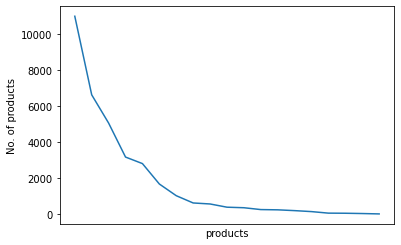

In [28]:
import matplotlib.pyplot as plt
t = product_data.copy()
t = t.sort_values(by='Number of ratings',ascending=False)
plt.plot(t.index,t['Number of ratings'])
plt.xticks([])
plt.xlabel("products")
plt.ylabel("No. of products")
plt.show()

In [29]:
product_data

,rating,Number of ratings
product_id,,
AV1YE_muvKc47QAVgpwE,4.707278,5056
AV1YnR7wglJLPUi8IJmi,4.424731,372
AV1YnRtnglJLPUi8IJmV,4.772355,3176
AVpfIfGA1cnluZ0-emyp,4.205479,73
AVpfl8cLLJeJML43AE3S,4.671098,6619
AVpfpK8KLJeJML43BCuD,4.531447,636
AVpftoij1cnluZ0-p5n2,4.862745,51
AVphPmHuilAPnD_x3E5h,4.729310,580
AVphgVaX1cnluZ0-DR74,4.454222,10966


In [30]:
item_user_matrix

username,.,000G,00100z,007Shopper,00Gambler,00worm,01bandit12,01taisha,02willie,062202jj,094m41,0golf0fun,1-Apr,1-Jan,1.23457E+24,1000011,10100915,1019,1021,102966,1029cr,1098,10thumbs,1111,111elite,1138,118001,1191946,1206,1215,1223,122551,1234,12345,123456,12345678,1234ABC,1234DarDar,1234abc,123Charlie,...,zackeemom,zahnd,zak65,zamlm27,zane1222,zapper,zarm7,zarqa,zcraig7,zedog83,zeezee29,zeiferx,zeke,zerofighterblue,zerosky,zeta054,zetyk,zgibbs,zia1dyv8,zigger74,ziggy24,zilch,zimm,zimnel91,zisme,zitouch,zitzy,zivasmommy,zlind5,zman,zmax192,zmo65,zombiedad,zombieicarus,zooloo,zoomzoommonkey,zphil,zsko91,zukecruiser,zumba
product_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AV1YE_muvKc47QAVgpwE,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.333333,0.0,0.0,5.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
AV1YnR7wglJLPUi8IJmi,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YnRtnglJLPUi8IJmV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
AVpfIfGA1cnluZ0-emyp,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVpfl8cLLJeJML43AE3S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0
AVpfpK8KLJeJML43BCuD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVpftoij1cnluZ0-p5n2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVphPmHuilAPnD_x3E5h,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVphgVaX1cnluZ0-DR74,0.0,0.0,0.0,0.0,0.0,4.0,5.0,5.0,0.0,0.0,5.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,4.5,5.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0,4.333333,5.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,4.0,5.0,5.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,4.0,0.0,4.0,0.0,0.0,4.0,5.0,0.0,0.0,0.0,0.0,4.0,0.0,3.0,3.0,0.0,5.0,0.0,0.0


In [31]:
x1 = item_user_matrix.copy()
x1.shape

(19, 26632)

In [32]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=10)
decomposed_matrix = svd.fit_transform(x1)
decomposed_matrix.shape

(19, 10)

In [33]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(19, 19)

In [34]:
i = 'AVqkIhwDv8e3D1O-lebb'

product_names = list(x1.index)
product_ID = product_names.index(i)
product_ID

16

In [35]:
corr_prod_id = correlation_matrix[product_ID]
corr_prod_id

array([-0.13988623, -0.2018859 , -0.08904752, -0.43812364, -0.05561297,
       -0.06513996,  0.1748817 , -0.25874086, -0.00680014, -0.1665489 ,
       -0.14912177, -0.13471191, -0.20487105, -0.32410235, -0.25774534,
       -0.08808584,  1.        ,  0.32086689, -0.17088202])

In [36]:
x1.index[corr_prod_id > 0.65]

Index(['AVqkIhwDv8e3D1O-lebb'], dtype='object', name='product_id')